## Hello, you ;)
This is a notebook for testing project ideas and ugly EDA stuff

In [1]:
# !pip install geopandas
# !pip install mapclassify
import geopandas as gpd
import mapclassify
import shapely
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', 150)

In [3]:
# load review data
reviews = pd.read_csv('../inputs/reviews.csv.gz', compression='gzip')
reviews["date"] = pd.to_datetime(reviews["date"])
reviews = reviews.drop('id', axis=1)

In [4]:
# load calander data
calendar = pd.read_csv('../inputs/calendar.csv.gz', compression='gzip')
calendar["date"] = pd.to_datetime(calendar["date"])

In [5]:
# Boston airbnb listings data
listings = pd.read_csv('../inputs/listings.csv.gz', compression='gzip')

In [6]:
# testing the combination of review and listing data (This is all reviews for each listing)
test_merge = pd.merge(listings, reviews.rename(columns={"listing_id":"id", "date":"review_date"}), on='id', how='left')

In [7]:
# testing combination of calendar and listing data (HELPFUL | This is all listing data on each date into the next year)
test_merge2 = pd.merge(calendar.rename(columns={"listing_id":"id"}), listings.rename(columns={"price":"3/2023_price"}), on='id', how='left')

In [8]:
reviews

,listing_id,date,reviewer_id,reviewer_name,comments
0,3781,2015-07-10,36059247,Greg,The apartment was as advertised and Frank was ...
1,3781,2015-08-09,10459388,Tai,It was a pleasure to stay at Frank's place. Th...
2,3781,2015-09-01,12264652,Damien,The apartment description is entirely faithful...
3,3781,2015-09-30,41426327,Mike,Thoroughly enjoyed my time at Frank's home. Ha...
4,3781,2015-10-30,15151513,Ivan,Great value for the money! This location has e...
...,...,...,...,...,...
162911,730465117588795606,2022-12-21,144733920,Marcello,I really enjoyed my time here!
162912,730465117588795606,2023-01-01,325113163,Kasey,Perfect for a quick weekend trip to Boston. Gr...
162913,730478965019511672,2022-11-26,164074348,Zhengyanyan,Very nice and helpful host!!! Very nice stay e...
162914,730478965019511672,2023-01-03,181777865,William,"Great place….new, clean, modern, spacious, amp..."


In [9]:
test_merge2[360:370]

,id,date,available,price,adjusted_price,minimum_nights_x,maximum_nights_x,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,3/2023_price,minimum_nights_y,maximum_nights_y,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
360,3781,2024-03-13,f,$125.00,$125.00,32.0,1125.0,https://www.airbnb.com/rooms/3781,20230319180919,2023-03-19,city scrape,HARBORSIDE-Walk to subway,Fully separate apartment in a two apartment bu...,"Mostly quiet ( no loud music, no crowed sidewa...",https://a0.muscache.com/pictures/24670/b2de044...,4804,https://www.airbnb.com/users/show/4804,Frank,2008-12-03,"Massachusetts, United States",My wife and I and grown children frequently oc...,within a day,89%,22%,t,https://a0.muscache.com/im/users/4804/profile_...,https://a0.muscache.com/im/users/4804/profile_...,East Boston,4,5,"['email', 'phone']",t,f,"Boston, Massachusetts, United States",East Boston,NaN,42.36413,-71.02991,Entire rental unit,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Wifi"", ""Stove"", ""Kitchen"", ""Dishwasher"", ""Fr...",$132.00,32,1125,32.0,32.0,1125.0,1125.0,32.0,1125.0,NaN,t,7,15,15,87,2023-03-19,24,2,0,2015-07-10,2022-09-05,4.96,5.00,4.96,5.00,4.96,4.88,4.92,NaN,f,1,1,0,0,0.26
361,3781,2024-03-14,f,$125.00,$125.00,32.0,1125.0,https://www.airbnb.com/rooms/3781,20230319180919,2023-03-19,city scrape,HARBORSIDE-Walk to subway,Fully separate apartment in a two apartment bu...,"Mostly quiet ( no loud music, no crowed sidewa...",https://a0.muscache.com/pictures/24670/b2de044...,4804,https://www.airbnb.com/users/show/4804,Frank,2008-12-03,"Massachusetts, United States",My wife and I and grown children frequently oc...,within a day,89%,22%,t,https://a0.muscache.com/im/users/4804/profile_...,https://a0.muscache.com/im/users/4804/profile_...,East Boston,4,5,"['email', 'phone']",t,f,"Boston, Massachusetts, United States",East Boston,NaN,42.36413,-71.02991,Entire rental unit,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Wifi"", ""Stove"", ""Kitchen"", ""Dishwasher"", ""Fr...",$132.00,32,1125,32.0,32.0,1125.0,1125.0,32.0,1125.0,NaN,t,7,15,15,87,2023-03-19,24,2,0,2015-07-10,2022-09-05,4.96,5.00,4.96,5.00,4.96,4.88,4.92,NaN,f,1,1,0,0,0.26
362,3781,2024-03-15,f,$150.00,$150.00,32.0,1125.0,https://www.airbnb.com/rooms/3781,20230319180919,2023-03-19,city scrape,HARBORSIDE-Walk to subway,Fully separate apartment in a two apartment bu...,"Mostly quiet ( no loud music, no crowed sidewa...",https://a0.muscache.com/pictures/24670/b2de044...,4804,https://www.airbnb.com/users/show/4804,Frank,2008-12-03,"Massachusetts, United States",My wife and I and grown children frequently oc...,within a day,89%,22%,t,https://a0.muscache.com/im/users/4804/profile_...,https://a0.muscache.com/im/users/4804/profile_...,East Boston,4,5,"['email', 'phone']",t,f,"Boston, Massachusetts, United States",East Boston,NaN,42.36413,-71.

In [10]:
# load census tract data for boston
tract_data = pd.read_csv("../inputs/census-tract-data.csv")

In [11]:
# load census neighborhood data for boston
neighborhood_data = pd.read_csv("../inputs/boston-neighborhood-data.csv")

In [12]:
calendar['date'].min()

Timestamp('2023-03-19 00:00:00')

In [13]:
calendar['date'].max()

Timestamp('2024-03-18 00:00:00')

In [14]:
reviews['date'].min()

Timestamp('2009-03-21 00:00:00')

In [15]:
reviews['date'].max()

Timestamp('2023-03-19 00:00:00')

In [16]:
listings['last_scraped'].min()

'2023-03-19'

In [17]:
listings['last_scraped'].max()

'2023-03-20'

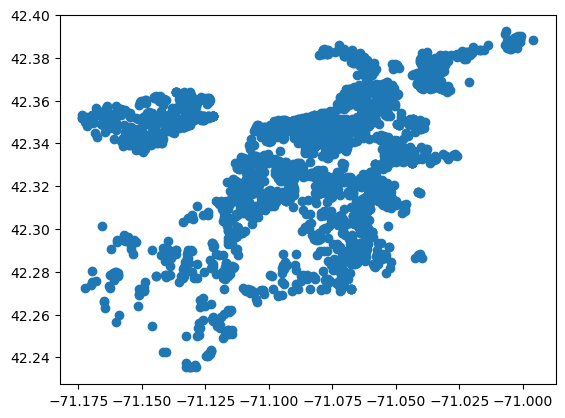

In [18]:
# this is where every Airbnb listing is in our data set (no map tho)
plt.scatter(listings['longitude'], listings['latitude'])

In [19]:
# gotta get a map of tracts
boston_tract = gpd.read_file("../inputs/Census2020_Tracts/Census2020_Tracts.shp")

In [20]:
# these coordinates are not standard
boston_tract['geometry'].head()

0    POLYGON ((757373.036 2913676.433, 757377.218 2...
1    POLYGON ((756308.459 2916770.814, 756446.058 2...
2    POLYGON ((757682.058 2924622.055, 757807.152 2...
3    POLYGON ((753408.502 2925331.042, 753418.584 2...
4    POLYGON ((759003.960 2926858.165, 759043.379 2...
Name: geometry, dtype: geometry

In [21]:
# set to the standard longitute/latitude system
boston_tract = boston_tract.to_crs('epsg:4326')

In [22]:
# much better
boston_tract['geometry'].head()

0    POLYGON ((-71.12623 42.24267, -71.12621 42.244...
1    POLYGON ((-71.13012 42.25117, -71.12960 42.251...
2    POLYGON ((-71.12491 42.27270, -71.12445 42.273...
3    POLYGON ((-71.14069 42.27470, -71.14065 42.275...
4    POLYGON ((-71.11999 42.27882, -71.11984 42.279...
Name: geometry, dtype: geometry

<Axes: >

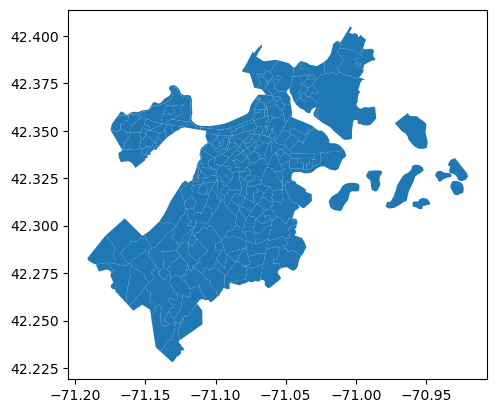

In [23]:
# census tracts map
boston_tract.plot()

In [24]:
# this step maps each longitude and latitude to a shapely point
listings = gpd.GeoDataFrame(listings, geometry=listings.apply(
        lambda srs: shapely.geometry.Point(srs['longitude'], srs['latitude']), axis='columns'
    ))

In [25]:
# function to create a new column based on whether or not a listing is in a tract
def assign_census_tract(bnb):
    bools = [geom.contains(bnb['geometry']) for geom in boston_tract['geometry']]
    if True in bools:
        return boston_tract.iloc[bools.index(True)]['NAME20']
    else:
        return np.nan

In [26]:
# .apply the function to the listings
listings['census_tract'] = listings.apply(assign_census_tract, axis='columns')

In [27]:
# this is how many listings are in each census tract
listings['census_tract'].value_counts().head()

702.02    105
907        98
701.02     92
814        87
701.04     87
Name: census_tract, dtype: int64

In [28]:
# use .map() to apply value_counts to each value of 'NAME20'
boston_tract['BNBs'] = boston_tract['NAME20'].map(listings['census_tract'].value_counts())
boston_tract['BNBs'] = boston_tract['BNBs'].fillna(0)

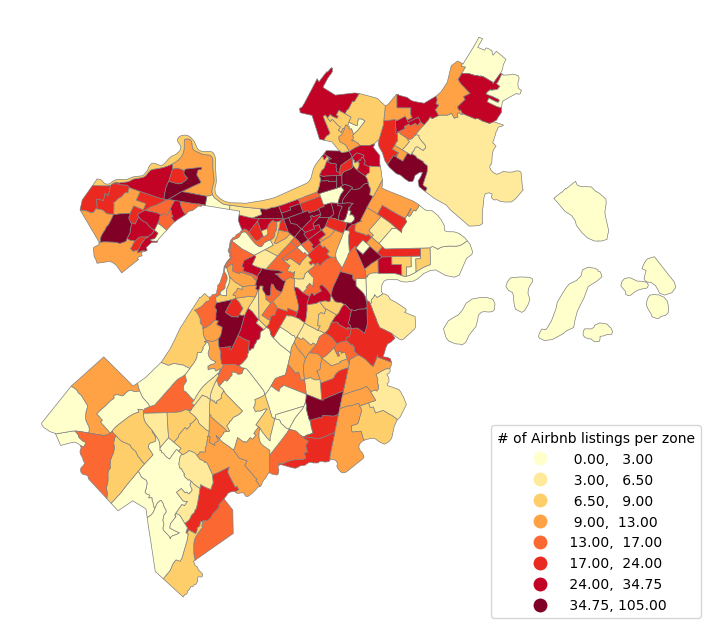

In [29]:
# what a nice choropleth map
# it shows the amount of listings in each zone
# but its not scaled for population density
f = plt.figure(figsize=(9,9.15))
ax = f.gca()
kw = dict(column='BNBs', k=8, cmap='YlOrRd', edgecolor='gray', linewidth=0.5)
boston_tract.plot(scheme='QUANTILES', ax=ax, **kw, legend=True, legend_kwds={'loc': 'lower right', 'title': '# of Airbnb listings per zone'})
ax.set_axis_off()

In [30]:
# this code reprojects the areas into an "equal-area" projection
# this is so that I can get listings per Kilometer^2
boston_tract['BNBDensity'] = (boston_tract['BNBs'] / boston_tract['geometry']\
                            .to_crs('epsg:3395')\
                            .map(lambda p: p.area / 10**6))\
                            .fillna(0)

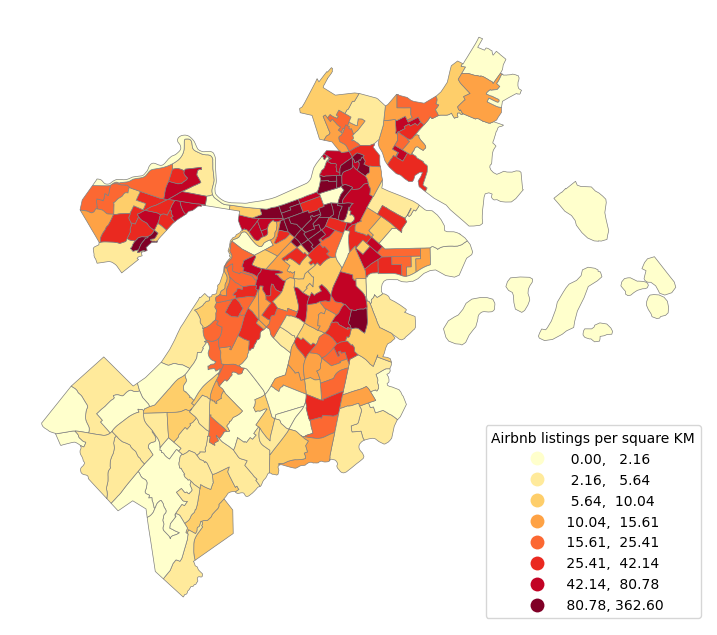

In [31]:
# this graph represents listings per square KM as census tracts
f = plt.figure(figsize=(9, 9))
ax = f.gca()
kw = dict(column='BNBDensity', k=8, cmap='YlOrRd', edgecolor='gray', linewidth=0.5)
boston_tract.plot(scheme='QUANTILES', ax=ax, **kw, legend=True, legend_kwds={'loc': 'lower right', 'title': "Airbnb listings per square KM"})
ax.set_axis_off()

### Next I will do the same but with neighborhood data. Mostly as a test

In [32]:
# map of neighborhoods
boston_NBH = gpd.read_file("../inputs/Census2020_BG_Neighborhoods/Census2020_BG_Neighborhoods.shp")

In [33]:
# gotta make same fix for CRS as above
boston_NBH = boston_NBH.to_crs('epsg:4326')

<Axes: >

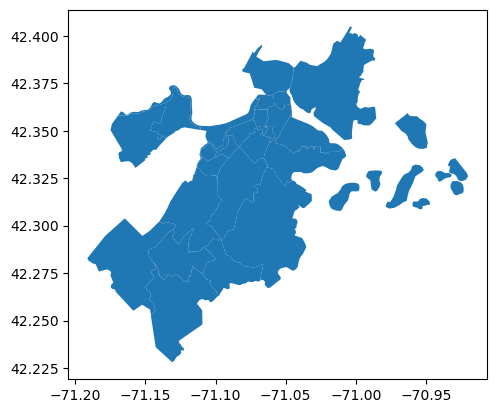

In [34]:
# neighborhood map
boston_NBH.plot()

In [35]:
# function to create a new column based on whether or not a listing is in a neighborhood
def assign_census_NBH(bnb):
    bools = [geom.contains(bnb['geometry']) for geom in boston_NBH['geometry']]
    if True in bools:
        return boston_NBH.iloc[bools.index(True)]['BlockGr202']
    else:
        return np.nan

In [36]:
# .apply the function to the listings
listings['census_NBH'] = listings.apply(assign_census_NBH, axis='columns')

In [37]:
# this is how many listings are in each Neighborhood
listings['census_NBH'].value_counts().head()

Dorchester    512
South End     327
Downtown      307
Roxbury       292
Brighton      284
Name: census_NBH, dtype: int64

In [38]:
# use .map() to apply value_counts to each value of 'BlockGr202'
boston_NBH['BNBs'] = boston_NBH['BlockGr202'].map(listings['census_NBH'].value_counts())
boston_NBH['BNBs'] = boston_NBH['BNBs'].fillna(0)

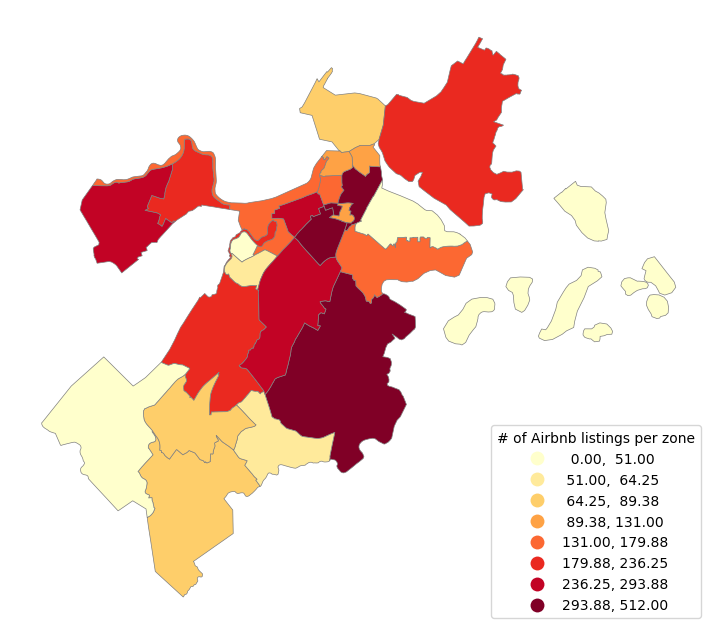

In [39]:
# choropleth map for neighborhoods
# disregards population density
f = plt.figure(figsize=(9,9.15))
ax = f.gca()
kw = dict(column='BNBs', k=8, cmap='YlOrRd', edgecolor='gray', linewidth=0.5)
boston_NBH.plot(scheme='QUANTILES', ax=ax, **kw, legend=True, legend_kwds={'loc': 'lower right', 'title': '# of Airbnb listings per zone'})
ax.set_axis_off()

In [40]:
# this code reprojects the areas into an "equal-area" projection
# this is so that I can get listings per Kilometer^2
boston_NBH['BNBDensity'] = (boston_NBH['BNBs'] / boston_NBH['geometry']\
                            .to_crs('epsg:3395')\
                            .map(lambda p: p.area / 10**6))\
                            .fillna(0)

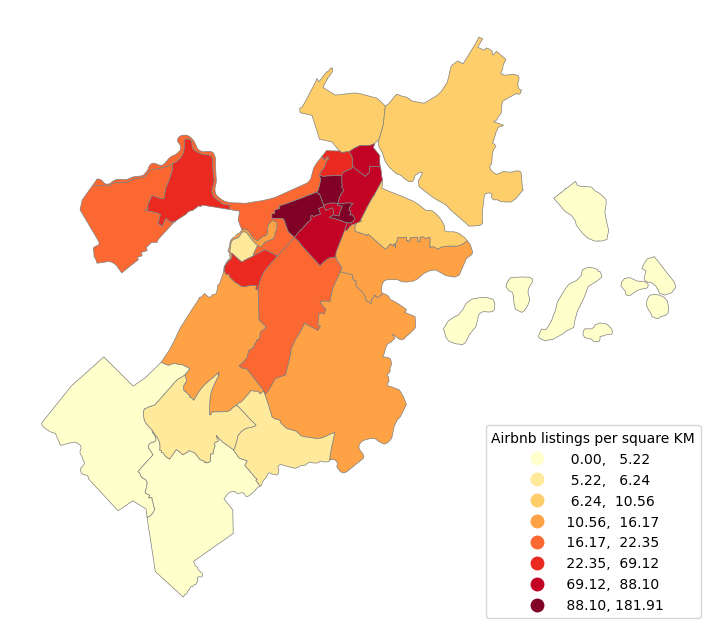

In [41]:
# this graph represents listings per square KM as Neighborhoods
f = plt.figure(figsize=(9, 9))
ax = f.gca()
kw = dict(column='BNBDensity', k=8, cmap='YlOrRd', edgecolor='gray', linewidth=0.5)
boston_NBH.plot(scheme='QUANTILES', ax=ax, **kw, legend=True, legend_kwds={'loc': 'lower right', 'title': "Airbnb listings per square KM"})
ax.set_axis_off()

In [42]:
# OLDER Boston airbnb listings data for test
listings_old = pd.read_csv('../inputs/listings_2022.csv.gz', compression='gzip')

In [43]:
import pandas as pd

In [44]:
calendar_old = pd.read_csv('../inputs/calendar_2022.csv.gz', compression='gzip')

In [45]:
calendar_old['date'].min()

'2022-06-13'

In [46]:
calendar_old['date'].max()

'2023-06-12'

In [47]:
listings_old

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,9569407,https://www.airbnb.com/rooms/9569407,20220613034341,2022-06-13,Clean & Cozy Newton/Boston College,"Queen bed room in house near BC, near T statio...",NaN,https://a0.muscache.com/pictures/93cbba82-23be...,44920239,https://www.airbnb.com/users/show/44920239,Marcia,2015-09-23,"Newton, Massachusetts, United States",I like to make new friends and travel,within a few hours,90%,22%,f,https://a0.muscache.com/im/users/44920239/prof...,https://a0.muscache.com/im/users/44920239/prof...,Newton,4,4,['phone'],t,t,NaN,Brighton,NaN,42.335880,-71.188110,Private room in rental unit,Private room,1,NaN,1 shared bath,1.0,1.0,"[""Long term stays allowed"", ""Essentials"", ""Sha...",$60.00,91,1125,91.0,91.0,1125.0,1125.0,91.0,1125.0,NaN,t,0,0,0,255,2022-06-13,13,0,0,2016-03-25,2019-09-02,4.85,5.00,5.00,5.00,5.00,4.92,4.77,NaN,f,2,0,2,0,0.17
1,31650137,https://www.airbnb.com/rooms/31650137,20220613034341,2022-06-13,Cozy Queen Bedroom close to Boston,"Sunny room in a clean, quiet home. Very quiet ...","Many ethnic restaurants, shops and supermarket...",https://a0.muscache.com/pictures/253151c2-1432...,13005723,https://www.airbnb.com/users/show/13005723,Anderson,2014-03-10,"Everett, Massachusetts, United States","I am a very friendly, respectful, laid back pe...",within an hour,100%,100%,t,https://a0.muscache.com/im/pictures/user/bfe89...,https://a0.muscache.com/im/pictures/user/bfe89...,Everett,2,2,"['email', 'phone']",t,t,"Everett, Massachusetts, United States",Charlestown,NaN,42.406450,-71.051800,Private room in home,Private room,1,NaN,1 shared bath,1.0,1.0,"[""Kitchen"", ""Long term stays allowed"", ""Coffee...",$104.00,2,30,2.0,2.0,30.0,30.0,2.0,30.0,NaN,t,25,55,85,85,2022-06-13,144,57,3,2019-03-01,2022-06-02,4.97,4.99,4.99,5.00,5.00,4.84,4.92,NaN,t,3,0,3,0,3.60
2,1724900,https://www.airbnb.com/rooms/1724900,20220613034341,2022-06-13,Charming sunlit house in Boston,A beautiful house in Rolsindale village an att...,A friendly neighborhood with many small restau...,https://a0.muscache.com/pictures/6ee29b73-6abc...,7723912,https://www.airbnb.com/users/show/7723912,Fj,2013-07-25,"Boston, Massachusetts, United States",Bonjour \r\nNous habitons à Boston aux Etats U...,within a day,50%,38%,f,https://a0.muscache.com/im/users/7723912/profi...,https://a0.muscache.com/im/users/7723912/profi...,Roslindale,2,2,"['email', 'phone']",t,f,"Boston, Massachusetts, United States",Roslindale,NaN,42.284470,-71.133010,Entire home,Entire home/apt,5,NaN,1.5 baths,2.0,2.0,"[""Kitchen"", ""Long term stays allowed"", ""Coffee...",$184.00,29,365,29.0,29.0,365.0,365.0,29.0,365.0,NaN,t,11,11,11,174,2022-06-13,44,0,0,2013-10-27,2020-11-30,4.61,4.86,4.81,4.95,4.79,4.56,4.65,NaN

In [48]:
merged = pd.merge(listings['id'], listings_old['id'], on='id')

# count the number of rows in the merged DataFrame
common_count = len(merged)

print(common_count)

2617
